# Identifying highly correlated gene/onts by spatial/readZs for punctate

Only using the BICCN dataset since it has both MERFISH (for input to SLRRP) and scRNAseq (for input to ReadZs)

In [1]:
import pandas as pd
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import seaborn as sns
import glob
import os

import SRRS
from SRRS import scoring

In [2]:
srrs_to_readzs_onts = {
    'Astro_1':'Astro',
    'Astro_2':'Astro',
    'Endo':'Endo',
    'L23_IT_1':'L2/3 IT',
    'L23_IT_2':'L2/3 IT',
    'L23_IT_3':'L2/3 IT',
    'L23_IT_4':'L2/3 IT',
    'L23_IT_5':'L2/3 IT',
    'L5_ET_1':'L5 ET',
    'L5_ET_2':'L5 ET',
    'L5_ET_3':'L5 ET',
    'L5_ET_4':'L5 ET',
    'L5_ET_5':'L5 ET',
    'L5_IT_1':'L5 IT',
    'L5_IT_2':'L5 IT',
    'L5_IT_3':'L5 IT',
    'L5_IT_4':'L5 IT',
    'L56_NP_1':'L5/6 NP',
    'L56_NP_2':'L5/6 NP',
    'L6_CT_1':'L6 CT',
    'L6_CT_2':'L6 CT',
    'L6_CT_3':'L6 CT',
    'L6_CT_4':'L6 CT',
    'L6_CT_6':'L6 CT',
    'L6_CT_7':'L6 CT',
    'L6_IT_1':'L6 IT',
    'L6_IT_2':'L6 IT',
    'L6_IT_3':'L6 IT',
    'L6_IT_Car3':'L6 IT Car3',
    'L6b_1':'L6b',
    'L6b_3':'L6b',
    'Lamp5_1':'Lamp5',
    'Lamp5_2':'Lamp5',
    'Lamp5_3':'Lamp5',
    'Lamp5_4':'Lamp5',
    'Lamp5_5':'Lamp5',
    'Lamp5_6':'Lamp5',
    'Lamp5_7':'Lamp5',
    'Lamp5_8':'Lamp5',
    'Lamp5_9':'Lamp5',
    'OPC':'OPC',
    'Oligo_1':'Oligo',
    'Oligo_2':'Oligo',
    'Oligo_3':'Oligo',
    'Pvalb_1':'Pvalb',
    'Pvalb_10':'Pvalb',
    'Pvalb_11':'Pvalb',
    'Pvalb_2':'Pvalb',
    'Pvalb_3':'Pvalb',
    'Pvalb_4':'Pvalb',
    'Pvalb_5':'Pvalb',
    'Pvalb_6':'Pvalb',
    'Pvalb_7':'Pvalb',
    'Pvalb_8':'Pvalb',
    'Pvalb_9':'Pvalb',
    'SMC':'SMC',
    'Sncg_1':'Sncg',
    'Sncg_2':'Sncg',
    'Sst_1':'Sst',
    'Sst_2':'Sst',
    'Sst_3':'Sst',
    'Sst_4':'Sst',
    'Sst_5':'Sst',
    'Sst_6':'Sst',
    'Sst_7':'Sst',
    'Sst_8':'Sst',
    'Sst_Chodl':'Sst',
    'VLMC':'VLMC',
    'Vip_1':'Vip',
    'Vip_10':'Vip',
    'Vip_2':'Vip',
    'Vip_3':'Vip',
    'Vip_4':'Vip',
    'Vip_5':'Vip',
    'Vip_6':'Vip',
    'Vip_7':'Vip',
    'Vip_8':'Vip',
    'Vip_9':'Vip',
}

In [3]:
#Read in the gene/cell punctate scores for all mice/samples
f_paths = glob.glob('../../outputs/gene_cell/mouse?sample?_punctate_scores.csv')

cell_gene_df = pd.DataFrame()

for f_path in f_paths:
    basename = os.path.basename(f_path).split('_')[0]
    mouse = int(basename[5])
    sample = int(basename[12])
    
    sample_df = pd.read_csv(f_path)
    sample_df['mouse'] = mouse
    sample_df['sample'] = sample
    
    cell_gene_df = pd.concat((cell_gene_df, sample_df))

cell_gene_df['annotation'] = cell_gene_df['annotation'].map(srrs_to_readzs_onts)
cell_gene_df = cell_gene_df.dropna() #remove annotations without mappings
cell_gene_df.head()

,metric,cell_id,annotation,num_spots,gene,num_gene_spots,score,variance,mouse,sample
35,puncta,100009332472089331948140672873134747603,L2/3 IT,736,Ptprk,10,0.866,0.000008,2,5
36,puncta,100009332472089331948140672873134747603,L2/3 IT,736,Satb2,29,-0.950,0.000005,2,5
37,puncta,100009332472089331948140672873134747603,L2/3 IT,736,Fam19a2,4,-0.274,0.000015,2,5
38,puncta,100009332472089331948140672873134747603,L2/3 IT,736,Cux2,42,0.592,0.000005,2,5
39,puncta,100009332472089331948140672873134747603,L2/3 IT,736,Ptprt,40,-0.812,0.000005,2,5


In [4]:
#calculate gene/ontology scores for mouse1 and mouse2 separately
gene_ont_df = pd.concat(
    scoring.gene_celltype_scoring(g, min_cells_per_gene_ont=10, extra_cols={'mouse':'Spatial_m{}'.format(m)})
    for m,g in cell_gene_df.groupby('mouse')
)

gene_ont_df.head()

,experiment,sample,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p,mouse
0,experiment1,5,puncta,1700022I11Rik,L2/3 IT,42,2.0,557.0,0.110,83.269419,0.0,0.0,Spatial_m1
1,experiment1,5,puncta,1700022I11Rik,L5 IT,24,2.0,769.0,0.087,93.825776,0.0,0.0,Spatial_m1
2,experiment1,5,puncta,1700022I11Rik,L6 IT,15,2.0,730.0,0.714,277.502281,0.0,0.0,Spatial_m1
3,experiment1,5,puncta,1810046K07Rik,Astro,15,2.0,152.0,-0.038,31.398471,0.0,0.0,Spatial_m1
4,experiment1,5,puncta,1810046K07Rik,L2/3 IT,434,2.0,633.0,0.279,683.095892,0.0,0.0,Spatial_m1


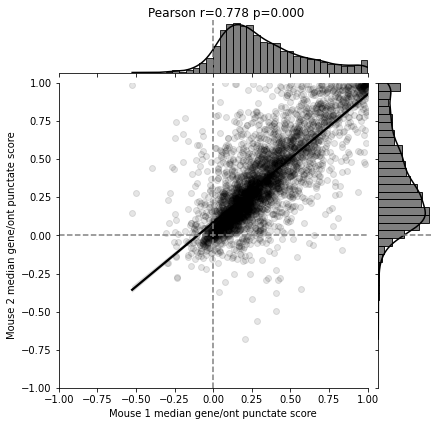

In [5]:
#Compare median punctate score per gene/ontology between mouse 1 and mouse 2
piv_df = gene_ont_df.pivot(
    index=['gene','annotation'],
    columns='mouse',
    values='med_score'
).dropna()

r,p = scp.stats.pearsonr(piv_df['Spatial_m1'],piv_df['Spatial_m2'])

g = sns.jointplot(
    x = 'Spatial_m1',
    y = 'Spatial_m2',
    kind = 'reg',
    color = 'black',
    scatter_kws = {'alpha':0.1},
    data = piv_df,
)
g.fig.subplots_adjust(top=0.95)
g.ax_joint.set_xlim(-1,1)
g.ax_joint.set_ylim(-1,1)
g.ax_joint.axhline(0, linestyle='dashed', color='grey')
g.ax_joint.axvline(0, linestyle='dashed', color='grey')
g.ax_marg_x.axvline(0, linestyle='dashed', color='grey')
g.ax_marg_y.axhline(0, linestyle='dashed', color='grey')
g.ax_joint.set_xlabel('Mouse 1 median gene/ont punctate score')
g.ax_joint.set_ylabel('Mouse 2 median gene/ont punctate score')
plt.suptitle('Pearson r={:.3f} p={:.3f}'.format(r,p))
plt.show()
plt.close()

In [6]:
#Reading in ReadZs 3' UTR results and simplifying by subsetting columns and renaming mice
readzs_df = pd.read_csv('../../outputs/readzs/UTR_level/MOp_10Xv3_no_unann_filt.csv')

keep_cols = ['gene','ontology','strand','mouse','median_z_scaled','perm_p_val']
mice_renames = {457911:'ReadZs_m1', 457909:'ReadZs_m2', 426003:'ReadZs_m3', 427378:'ReadZs_m4'}
readzs_df['mouse'] = readzs_df['mouse'].replace(mice_renames)

readzs_df = readzs_df[keep_cols].sort_values('perm_p_val')
readzs_df['significant'] = np.where(readzs_df['perm_p_val'].le(0.05),True,False)
readzs_df.head()

,gene,ontology,strand,mouse,median_z_scaled,perm_p_val,significant
5370,Rnf152,Pvalb,-,ReadZs_m1,-0.093755,0.0,True
8280,Tmem163,Oligo,-,ReadZs_m1,0.989287,0.0,True
4523,Sema5a,L2/3 IT,+,ReadZs_m2,0.915539,0.0,True
4522,Sema5a,Sst,+,ReadZs_m2,0.760410,0.0,True
4521,Sema5a,Sncg,+,ReadZs_m2,0.587758,0.0,True


In [7]:
#Merging the spatial and ReadZs datasets
m = gene_ont_df.merge(readzs_df, left_on=['gene','annotation'], right_on=['gene','ontology'])
m = m.rename(columns={'mouse_x':'spatial_mouse','mouse_y':'readzs_mouse'})
m.head()

,experiment,sample,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p,spatial_mouse,ontology,strand,readzs_mouse,median_z_scaled,perm_p_val,significant
0,experiment1,5,puncta,1700022I11Rik,L2/3 IT,42,2.0,557.0,0.110,83.269419,0.0,0.0,Spatial_m1,L2/3 IT,+,ReadZs_m1,-0.186509,0.18,False
1,experiment1,5,puncta,1700022I11Rik,L2/3 IT,42,2.0,557.0,0.110,83.269419,0.0,0.0,Spatial_m1,L2/3 IT,+,ReadZs_m2,-0.231711,0.90,False
2,experiment1,5,puncta,1700022I11Rik,L2/3 IT,42,2.0,557.0,0.110,83.269419,0.0,0.0,Spatial_m1,L2/3 IT,+,ReadZs_m3,-0.149931,1.00,False
3,experiment1,5,puncta,1700022I11Rik,L2/3 IT,42,2.0,557.0,0.110,83.269419,0.0,0.0,Spatial_m1,L2/3 IT,+,ReadZs_m4,-0.139005,1.00,False
4,experiment1,5,puncta,1700022I11Rik,L2/3 IT,38,2.0,732.5,0.225,173.801306,0.0,0.0,Spatial_m2,L2/3 IT,+,ReadZs_m1,-0.186509,0.18,False


In [8]:
#Calculate the correlation of median gene/ont spatial and ReadZs scores (do BH correction)
from statsmodels.stats import multitest

gene_corrs = (
    m
        .groupby('gene')
        .filter(lambda g: len(g) > 1)
        .groupby('gene')
        .apply(lambda g: (*scp.stats.pearsonr(g['med_score'],g['median_z_scaled']),g['ontology'].nunique()))
)

gene_corrs_df = pd.DataFrame(gene_corrs.to_list(),columns=['r','p','num_onts'],index=gene_corrs.index)
gene_corrs_df = gene_corrs_df.sort_values('p').dropna()

_,adj_p,_,_ = multitest.multipletests(
    gene_corrs_df['p'],
    alpha = 0.05,
    method = 'fdr_bh',
)

gene_corrs_df['p_BH'] = adj_p


gene_corrs_df.head()

,r,p,num_onts,p_BH
gene,,,,
Chn2,-0.779152,1.393103e-39,14,2.911585e-37
Slc32a1,0.804645,1.636918e-38,11,1.710579e-36
Tmem163,-0.694531,2.781509e-31,14,1.937785e-29
Inpp4b,0.622905,3.554555e-24,17,1.857255e-22
Bcl11b,-0.624260,7.191607e-24,14,3.006092e-22


In [9]:
#Add the correlation results back into the merged table
m = m.set_index('gene')
m['corr_r'] = gene_corrs_df['r']
m['corr_p'] = gene_corrs_df['p']
m['corr_p_BH'] = gene_corrs_df['p_BH']
m['num_onts'] = gene_corrs_df['num_onts']
m = m.reset_index()
m.head()

,gene,experiment,sample,metric,annotation,num_cells,med_gene_spots,med_spots,med_score,z,...,ontology,strand,readzs_mouse,median_z_scaled,perm_p_val,significant,corr_r,corr_p,corr_p_BH,num_onts
0,1700022I11Rik,experiment1,5,puncta,L2/3 IT,42,2.0,557.0,0.110,83.269419,...,L2/3 IT,+,ReadZs_m1,-0.186509,0.18,False,0.151787,0.522937,0.683087,3
1,1700022I11Rik,experiment1,5,puncta,L2/3 IT,42,2.0,557.0,0.110,83.269419,...,L2/3 IT,+,ReadZs_m2,-0.231711,0.90,False,0.151787,0.522937,0.683087,3
2,1700022I11Rik,experiment1,5,puncta,L2/3 IT,42,2.0,557.0,0.110,83.269419,...,L2/3 IT,+,ReadZs_m3,-0.149931,1.00,False,0.151787,0.522937,0.683087,3
3,1700022I11Rik,experiment1,5,puncta,L2/3 IT,42,2.0,557.0,0.110,83.269419,...,L2/3 IT,+,ReadZs_m4,-0.139005,1.00,False,0.151787,0.522937,0.683087,3
4,1700022I11Rik,experiment1,5,puncta,L2/3 IT,38,2.0,732.5,0.225,173.801306,...,L2/3 IT,+,ReadZs_m1,-0.186509,0.18,False,0.151787,0.522937,0.683087,3


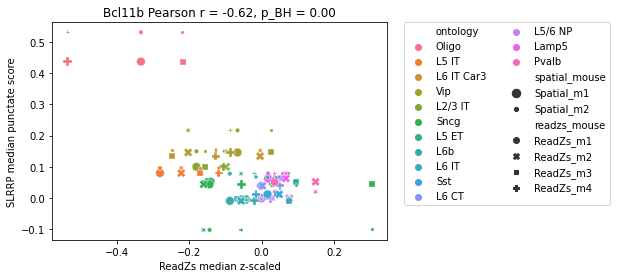

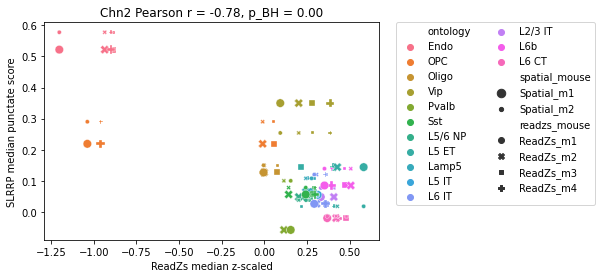

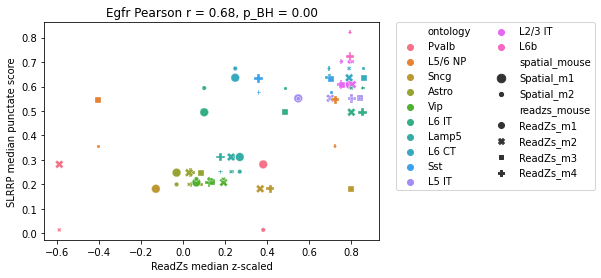

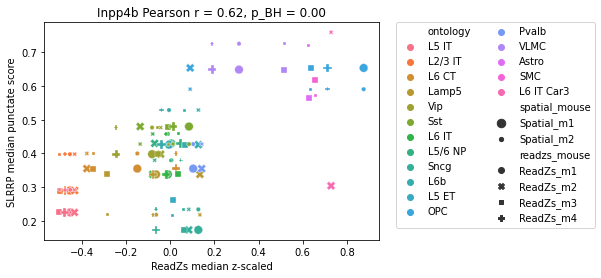

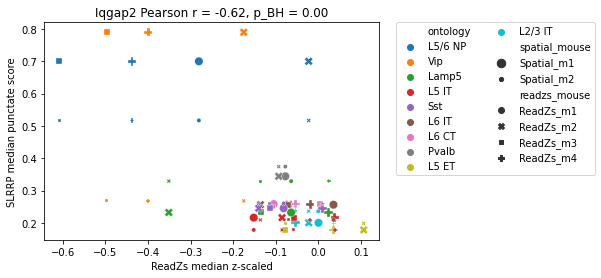

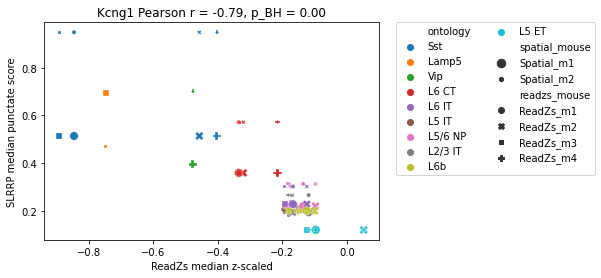

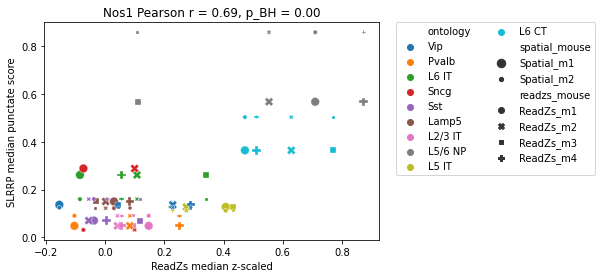

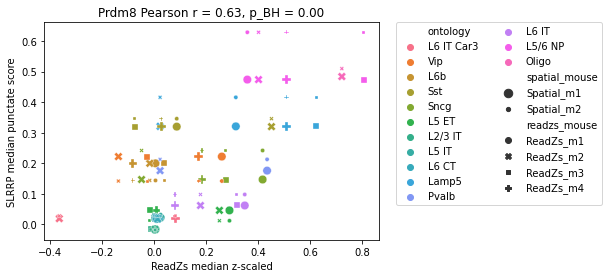

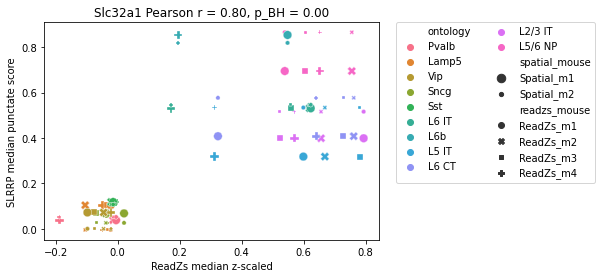

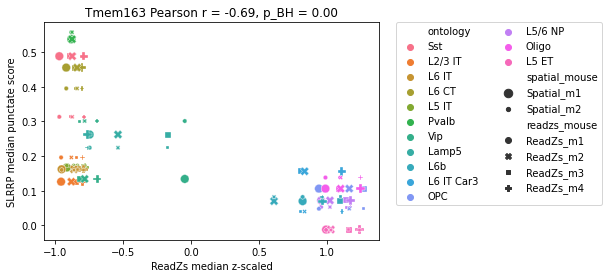

In [10]:
#Plot Pearson correlation significant gene/onts between spatial/ReadZs
#implemented other filtering as well on effect size of correlation and minimum required samples
filt_m = m[
    m['corr_p_BH'].le(0.05) &
    m['corr_r'].abs().ge(0.6) &
    m['num_onts'].ge(10)
].groupby(
    ['gene']
).filter(
    lambda g: (g['readzs_mouse'].nunique() >= 3) and (g['spatial_mouse'].nunique() == 2)
)

pdf = matplotlib.backends.backend_pdf.PdfPages('punctate_corr_readzs_genes.pdf')

for (gene,corr_p_bh,corr_r),g in filt_m.groupby(['gene','corr_p_BH','corr_r']):
    hue_order = g.groupby('ontology')['median_z_scaled'].min().sort_values().index
    
    fig = plt.figure()
    ax = sns.scatterplot(
        x = 'median_z_scaled',
        y = 'med_score',
        hue = 'ontology',
        style = 'readzs_mouse',
        size = 'spatial_mouse',
        hue_order = hue_order,
        style_order = sorted(g['readzs_mouse'].unique()),
        size_order = sorted(g['spatial_mouse'].unique()),
        data = g,
    )
    plt.title('{} Pearson r = {:.2f}, p_BH = {:.2f}'.format(gene,corr_r,corr_p_bh))
    plt.xlabel('ReadZs median z-scaled')
    plt.ylabel('SLRRP median punctate score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, ncol=2)
    plt.show(ax)
    
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()
    
pdf.close()